

```
# This is formatted as code
```

## CSCI 316, T01, G12
## Group Assignment 1

- Emily Gong Xue Ying: 7673620
- Lai Wei Jie: 7770042
- Lee Kuok Wei : 7673607
- Li Biyang : 7352670

# End to End Data Mining Project
## Classification Problem: to analyse a loan data set for credit risk analysis
Target variable: default (index)

- a) Discover and visualise the data
- b) Prepare the data for ML
- c) Select and train models
- d) Fine-tune the models
- e) Evaluate outcomes


# Discover and visualise the data


Dataset: Loan data set for credit risk analysis (https://www.kaggle.com/datasets/rameshmehta/credit-risk-analysis)

Moreover, the dataset is very
unbalanced, with approximately 6 % of loans considered as defaulted. This
dataset has different types of features such as categorical, numeric & date.

## Uploading and reading the data




In [ ]:
import pandas as pd
import csv

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/dataset/data.csv"
df =  pd.read_csv(path)

df.head(10)

Mounted at /content/drive


<ipython-input-1-e91b16405913>:8: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(path)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Exploratory Visualisations

### Histograms

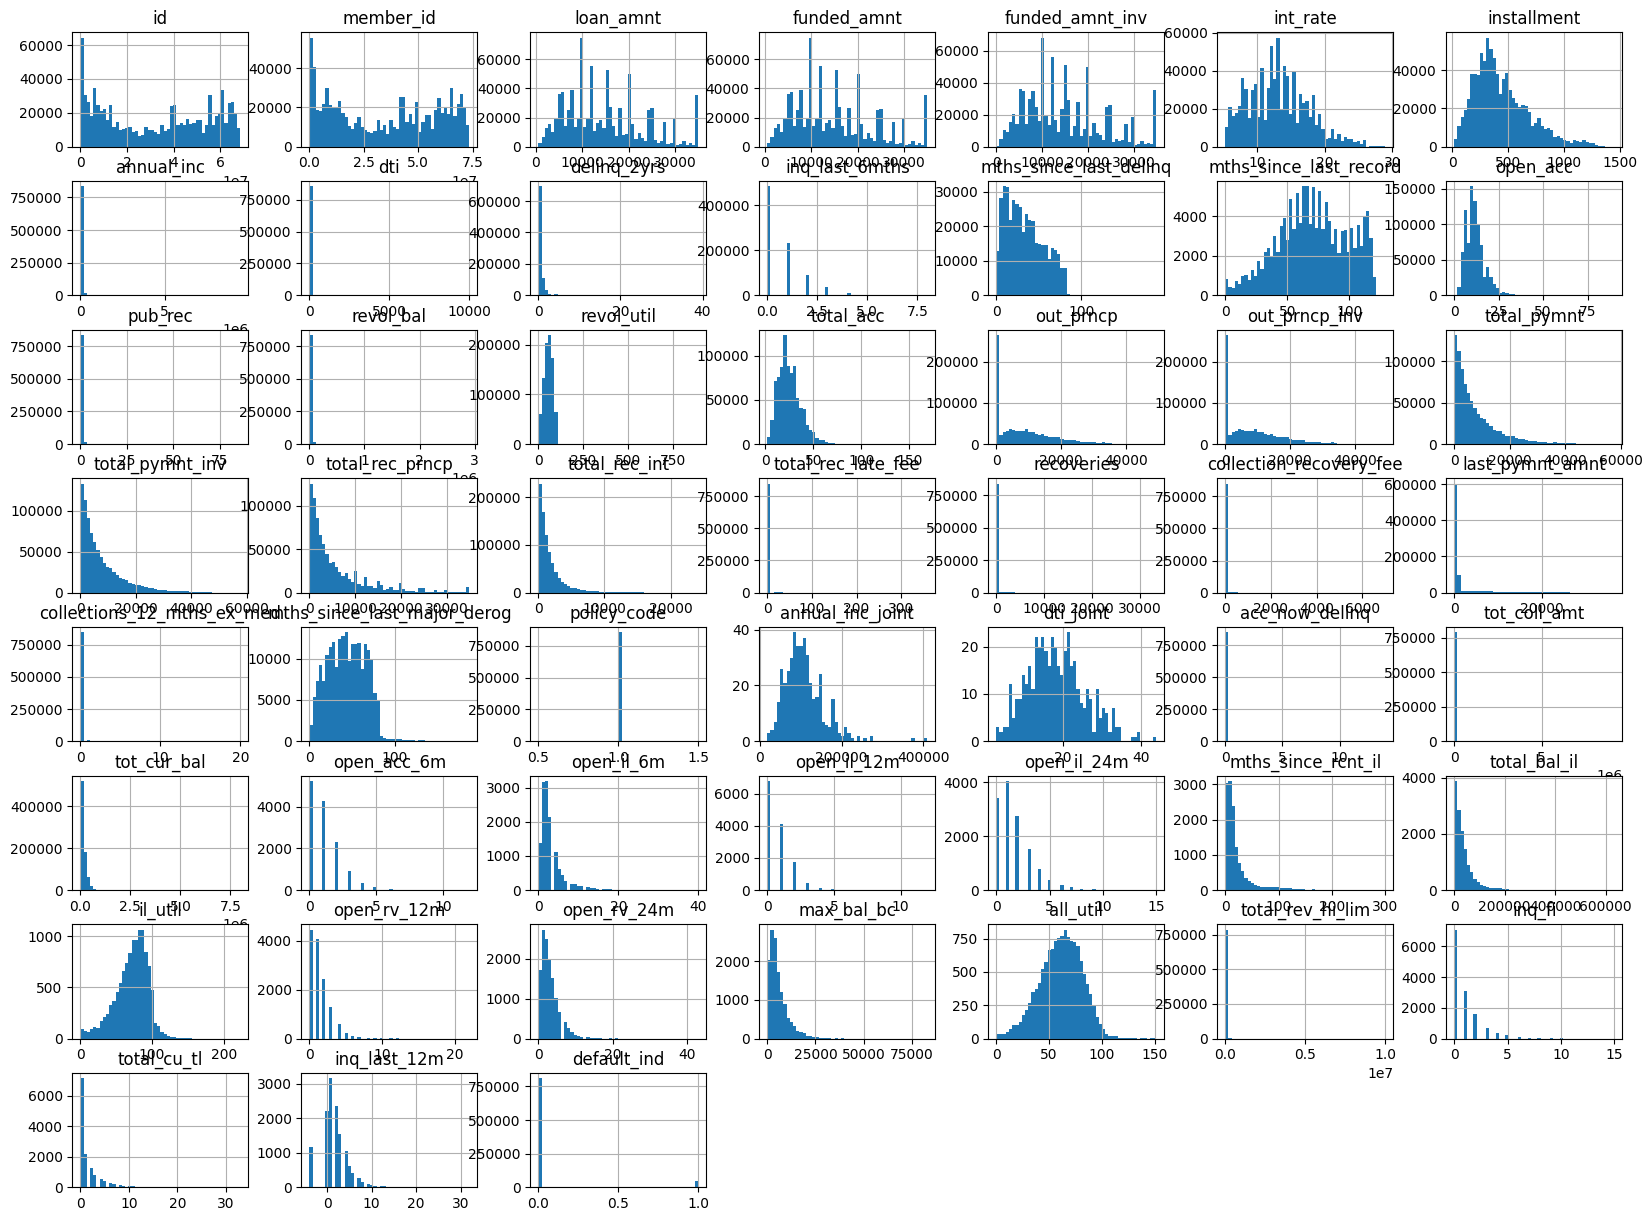

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the histograms for attributes
df.hist(bins = 50, figsize = (20, 15))
plt.show()

### Interpretation

To start off, the x-axis represents the range of values for each attribute and is divided into bins that represents a specific range of values. The y-axis represents the frequency of values within each bin. It shows how many data points fall within the corresponding range of values on the x-axis.

1) Shape of histograms

Symmetric Distribution: The histogram is roughly symmetrical around a central value which indicates a normal distribution. This means that the data points are evenly distributed around the mean, and there are approximately an equal number of data points on both sides of the central value. From the result shown above, an example is all_util.

Skewed Distribution: The histogram is skewed to the left or right. A left-skewed (negative-skewed) distribution indicates that the majority of the data points are on the right side. A right-skewed (positive-skewed) distribution indicates that the majority of the data points are on the left side. An example of this is total_pymnt.

2) Central Tendency: The central tendency of the data can be estimated from the histogram. For a symmetric distribution, the peak of the histogram corresponds to the mean, median, and mode, which are all the same in a normal distribution. For skewed distributions, these measures may differ.

3) Spread: The spread or variability of the data can be observed by looking at the width of the histogram. A wider histogram indicates higher variability, whereas a narrower histogram indicates lower variability. For example, the attribute max_bal_bc has a higher variability than all_util.

4) Outliers: Outliers, which are extreme values in the data, can also be identified from the histogram. Outliers are data points that lie far away from the bulk of the data and may appear as isolated bars far from the main distribution. For example, it is observed that there are outliers in the histogram of annual_inc_joint.

5) Multimodal Distribution: If there are multiple peaks in the histogram, it suggests a multimodal distribution, indicating that the data may have multiple distinct groups or categories.

### Symmetric distribution example

<Axes: >

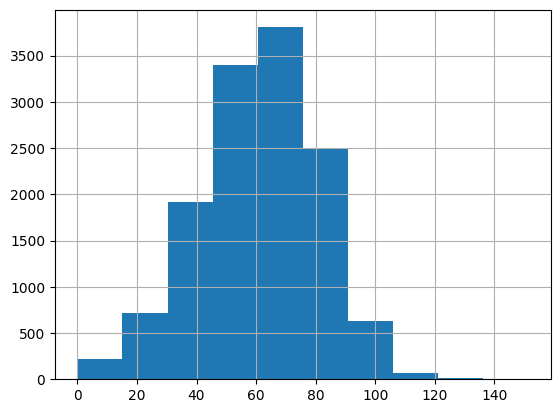

In [ ]:
df['all_util'].hist()

### Skewed distribution example

<Axes: >

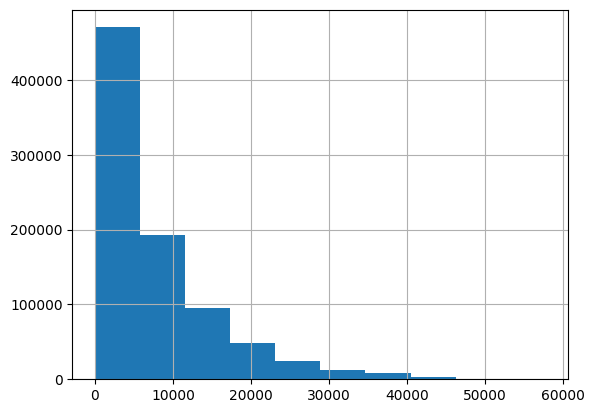

In [ ]:
df['total_pymnt'].hist()

### Outliers example

<Axes: >

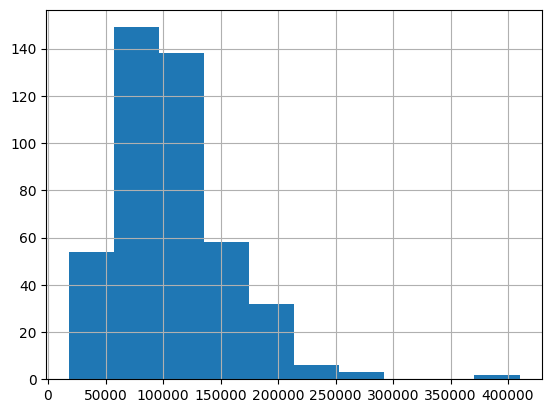

In [ ]:
df['annual_inc_joint'].hist()

#Prepare the data for machine learning algorithms






## Check for duplicate rows

In [ ]:
# Check if there is any duplicate rows and drop them
df = df.drop_duplicates(subset = None, keep = 'first', inplace = False)
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df

Number of duplicate rows: 0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0


Based on the result above, there is no duplicate row.

## First review of columns to be removed

Based on the dictionary provided, they are some attributes that are not relevant to predicting the loan default and will be removed.

In [ ]:
# First review of columns to be removed (data that serve little meanings)
unhelpColumns = ['id','member_id','grade','emp_title','desc','title','zip_code','verification_status_joint']
df.drop(unhelpColumns, axis=1, inplace=True)


## Refine attributes

Convert date object columns to useful information of float type




In [ ]:
# Find the neighbor index where new derived columns will be inserted
target_index = df.columns.get_loc('issue_d')

# Insert the new column (pymnt_gap) beside the specific column
df.insert(target_index + 1, 'pymnt_gap', '')

# Insert the new column (pymnt_duration) beside the specific column
df.insert(target_index + 1, 'pymnt_duration', '')

# Insert the new column (credit_hist) beside the specific column
df.insert(target_index + 1, 'credit_hist', '')



In [ ]:
# Convert the object-type columns to datetime type
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


# Update pymnt_duration: How long payment has been ongoing in days
df['pymnt_duration'] = (df['last_pymnt_d'] - df['issue_d']).dt.days

# Update pymnt_gap: What is the duration from previous payment to next payment in days
df['pymnt_gap'] = (df['next_pymnt_d'] - df['last_pymnt_d']).dt.days

# Update credit_hist: The Earliest activation of credit account to when loan issued
df['credit_hist'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [ ]:
# Once the dates have been used, remove them

# Second review of unhelpful columns to be removed (dates)
dateColumns = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
df.drop(dateColumns, axis=1, inplace=True)

Convert some object columns into float columns via numeric extraction

In [ ]:
# Extract numbers in object columns & convert to float
import pandas as pd

# Update column emp_length
df['emp_length'] = df['emp_length'].str.extract('(\d+)', expand=False).astype(float)

# Update column term
df['term'] = df['term'].str.extract('(\d+)', expand=False).astype(float)

## Encoding categorical columns

In [ ]:
# Get the list of integer & float columns (excluding the last column)
obj_columns = df.select_dtypes(include='object').columns.tolist()
df[obj_columns].head(3)

,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,B2,RENT,Verified,n,credit_card,AZ,f,INDIVIDUAL
1,C4,RENT,Source Verified,n,car,GA,f,INDIVIDUAL
2,C5,RENT,Not Verified,n,small_business,IL,f,INDIVIDUAL


In [ ]:
# Identify the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')

### Label encoding

To calculate the correlations, categorical columns need to be converted to numerical columns in the first place.

In the list above, label encoding should be applied to sub_grade as it represents an ordinal relationship among the sub-grades (eg. A1<A2<A3). Label encoding will preserve this order while converting them to numerical values. One-hot encoding will be applied to other attributes as they are nominal and do not have an inherent order.

Use label encoder to convert columns of objects to columns of floats

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns

df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df['addr_state'] = label_encoder.fit_transform(df['addr_state'])


### One-hot encoding

Use hot encoder to convert columns of objects objects to columns of binary

In [ ]:
# Get the list of integer & float columns (excluding the last column)
obj_columns = df.select_dtypes(include='object').columns.tolist()
df[obj_columns].head(3)

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type
0,RENT,Verified,n,f,INDIVIDUAL
1,RENT,Source Verified,n,f,INDIVIDUAL
2,RENT,Not Verified,n,f,INDIVIDUAL


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named df

# Specify the columns to encode
columns_to_encode = ['home_ownership', 'verification_status', 'pymnt_plan', 'initial_list_status', 'application_type']

# Extract the columns to be encoded and reshape them to a 2D array
columns_data = df[columns_to_encode].values

# Create an instance of the OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Apply one-hot encoding to the selected columns
encoded_data = one_hot_encoder.fit_transform(columns_data)

# Get the column names for the one-hot encoded features
feature_names = one_hot_encoder.get_feature_names_out(columns_to_encode)

# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Drop the original columns from the DataFrame
df = df.drop(columns=columns_to_encode)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)



# **User Defined Feature**

##Total Payment Ratio = total payment / loan amount

Indicates what proportion of the loan amount has been paid off so far

In [ ]:
def add_total_pymnt_ratio(df, flag):
    if flag:
        df['total_pymnt_ratio'] = df['total_pymnt'] / df['loan_amnt']
    return df

df_encoded = add_total_pymnt_ratio(df_encoded, True)


In [ ]:
# Rearrange df_encoded for default ind to be last column

columns = df_encoded.columns.tolist()
columns.remove('default_ind')
columns.append('default_ind')
df_encoded = df_encoded[columns]


## Addressing missing values

Fill missing values with median and scale all values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Get the list of integer & float columns (excluding the last column target)
num_columns = df_encoded.select_dtypes(include=['int64','float64']).columns.tolist()[:-1]

# Create a subset of the DataFrame with the integer columns
X = df_encoded[num_columns]

# Initialize the imputer with a strategy to fill missing values (e.g., using median)
imputer = SimpleImputer(strategy='median')

# Impute missing values in the integer columns
X_imputed = imputer.fit_transform(X)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the integer columns
scaled_values = scaler.fit_transform(X_imputed)

# Create a new DataFrame with the scaled values
df_scaled = pd.DataFrame(scaled_values, columns=X.columns)

# Assign the scaled values back to the original DataFrame, excluding the last column
df_encoded[num_columns] = df_scaled


## Filter by correlation to determine the attributes used to train models

Create and then sort columns by correlation to default_ind

In [ ]:
# Calculate the correlation between numeric variables and the target variable
correlation_with_target = df_encoded.corrwith(df['default_ind'])

# Sort the correlation values in descending order (absolute values)
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Print the sorted correlation values
# print(sorted_correlation)



In [ ]:
# Show all rows
pd.set_option('display.max_rows',None)
print(sorted_correlation)

default_ind                            1.000000
recoveries                             0.475738
collection_recovery_fee                0.330764
out_prncp                              0.225960
out_prncp_inv                          0.225959
int_rate                               0.155037
total_rec_late_fee                     0.140760
sub_grade                              0.126923
initial_list_status_f                  0.098812
initial_list_status_w                  0.098812
total_rec_prncp                        0.090336
last_pymnt_amnt                        0.087217
pymnt_gap                              0.084740
inq_last_6mths                         0.074407
pymnt_duration                         0.057103
total_pymnt_ratio                      0.056362
verification_status_Verified           0.050291
credit_hist                            0.046097
total_rec_int                          0.046050
tot_cur_bal                            0.045139
revol_util                             0

We filter out unecessary columns which are those attributes with absolute correlation lower than 0.01 and they will be removed.

In [ ]:
correlation_threshold = 0.01
filtered_columns = df_encoded.columns[df_encoded.corr()['default_ind'].abs() >= correlation_threshold]


In [ ]:
processed_df = df_encoded[filtered_columns]
df = processed_df


## Checking for attributes outliers




In [ ]:
outliers = []
def outlierFinder(dataF, col):
  # Use Quatile 3 value to subtract Quatile 1 value to get interquatile range
  # The lower quartile, or first quartile (Q1), is the value under which 25% of data
  # The upper quartile, or third quartile (Q3), is the value under which 75% of data
  Q1 = np.percentile(np.array(dataF[col].tolist()), 25)
  Q3 = np.percentile(np.array(dataF[col].tolist()), 75)
  interquatileRange = Q3-Q1

  upperBound = Q3 + (3 * interquatileRange)
  lowerBound = Q1 - (3 * interquatileRange)

  count = 0

  for value in dataF[col].tolist():
    if((value <lowerBound ) |(value>upperBound)):
      # Increment the outliers count when the values fall outside of the interqu
      count+=1
  outliers.append(count)
  return lowerBound, upperBound, count

Finding outliers in columns of data type Sparse[uint8, 0] may not be meaningful because these columns typically represent categorical variables encoded using one-hot encoding. The Sparse[uint8, 0] data type is used to efficiently store binary data where most of the entries are zero. Thus, only the outliers of the integer and float attributes will be evaluated.

In [ ]:
import numpy as np
# Select the numerical attributes
numerical_att = df.select_dtypes(include=['float64', 'int64'])
numerical_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 0 to 855968
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 855969 non-null  float64
 1   int_rate                             855969 non-null  float64
 2   sub_grade                            855969 non-null  float64
 3   emp_length                           855969 non-null  float64
 4   annual_inc                           855969 non-null  float64
 5   credit_hist                          855969 non-null  float64
 6   pymnt_duration                       855969 non-null  float64
 7   pymnt_gap                            855969 non-null  float64
 8   purpose                              855969 non-null  float64
 9   inq_last_6mths                       855969 non-null  float64
 10  mths_since_last_record               855969 non-null  float64
 11  open_acc     

In [ ]:
# Display the number of outliers of each attribute
for attribute in numerical_att:
  if(outlierFinder(df, attribute)[2] > 0):
    print(f'There is {outlierFinder(df, attribute)[2]} outliers in {attribute}')

There is 11687 outliers in annual_inc
There is 1743 outliers in credit_hist
There is 53 outliers in pymnt_duration
There is 168074 outliers in pymnt_gap
There is 350577 outliers in purpose
There is 13940 outliers in inq_last_6mths
There is 129393 outliers in mths_since_last_record
There is 3322 outliers in open_acc
There is 130514 outliers in pub_rec
There is 17586 outliers in revol_bal
There is 4 outliers in revol_util
There is 856 outliers in total_acc
There is 8079 outliers in total_pymnt
There is 8235 outliers in total_pymnt_inv
There is 13036 outliers in total_rec_prncp
There is 22622 outliers in total_rec_int
There is 9974 outliers in total_rec_late_fee
There is 24187 outliers in recoveries
There is 23035 outliers in collection_recovery_fee
There is 144596 outliers in last_pymnt_amnt
There is 11145 outliers in collections_12_mths_ex_med
There is 6660 outliers in tot_cur_bal
There is 6501 outliers in open_il_12m
There is 9251 outliers in open_il_24m
There is 10801 outliers in open

### Find the attributes with the most outliers

In [ ]:
# To remove outliers in the list
unique_outliers = frozenset(outliers)
total_outliers = 0
sorted_outliers = sorted(unique_outliers, reverse = True)

for outlier in unique_outliers:
 total_outliers += outlier

print("Total number of outliers: ", total_outliers)
# We arrange the outliers number in descending order
print("Outliers in descending orders: ", sorted_outliers)

Total number of outliers:  1204617
Outliers in descending orders:  [350577, 168074, 144596, 130514, 129393, 46467, 24187, 23035, 22622, 19910, 17586, 13940, 13036, 11687, 11145, 10801, 9974, 9251, 8235, 8079, 6660, 6501, 6212, 6157, 3322, 1743, 856, 53, 4, 0]


From the result shown above, the 3 attributes with the most outliers are purpose, pymnt_gap, and pymnt_amnt.

## Scaling all processed data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Get the list of integer & float columns (excluding the last column target)
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()[:-1]

# Create a subset of the DataFrame with the integer columns
X = df[num_columns]

# Initialize the imputer with a strategy to fill missing values (e.g., using mean)
imputer = SimpleImputer(strategy='median')

# Impute missing values in the integer columns
X_imputed = imputer.fit_transform(X)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the integer columns
scaled_values = scaler.fit_transform(X_imputed)

# Create a new DataFrame with the scaled values
df_scaled = pd.DataFrame(scaled_values, columns=X.columns)

# Assign the scaled values back to the original DataFrame, excluding the last column
df[num_columns] = df_scaled

<ipython-input-25-b676b087eb6a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_columns] = df_scaled


In [ ]:
#df.to_csv('/content/drive/My Drive/mydata.csv', index=False) #midpoint export to csv for future reference


## Splitting data into test and train data

---
Training data: X_train, X_test
Testing data: y_train, y_test



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming 'default_ind' is the column representing your target variable
# Replace 'test_size' with the desired proportion for the test dataset (0.2 for 20%)

feature_columns = df.drop('default_ind', axis=1)  # Features (input data)
target_column = df['default_ind']  # Target variable (labels)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42) #i tried n =1, too high accuracy

for train_index, test_index in sss.split(feature_columns, target_column):
    X_train, X_test = feature_columns.iloc[train_index], feature_columns.iloc[test_index]
    y_train, y_test = target_column.iloc[train_index], target_column.iloc[test_index]

Stratified shuffle split seperates train and test data with a balanced number of cases in relation to the target variable. This gives us a balanced sample for Machine Learning.

## SMOTE Implementation

Apply SMOTE to oversample the minority class in the training set

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

SMOTE synthesizes more cases of the minority class (cases where default is 1, 6% of total samples), so that training can be based on more balanced classes.

# Select and train models

## Model 1:
### Linear Support Vector Classifier

Implement Training Model

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
clf = LinearSVC(max_iter=5000)

# Train the model
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating the Model
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    161901
           1       0.74      0.95      0.83      9293

    accuracy                           0.98    171194
   macro avg       0.87      0.96      0.91    171194
weighted avg       0.98      0.98      0.98    171194



Linear Support Vector Classifier




Visualise Training Model


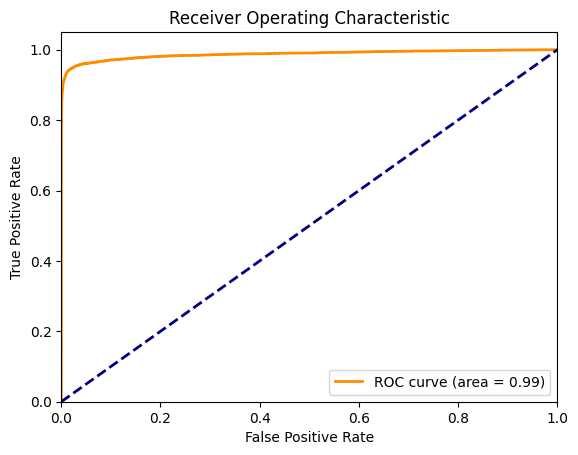

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute decision function values for the samples in X_test
y_score = clf.decision_function(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Reference line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Printing of Confusion Matrix

[[true negatives, false positives],
 [false negatives, true positives]]

In [ ]:
# import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(cm)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

[[158814   3087]
 [   507   8786]]


## Model 2:
### XG-Boost

Implement Training Model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create a XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161901
           1       1.00      1.00      1.00      9293

    accuracy                           1.00    171194
   macro avg       1.00      1.00      1.00    171194
weighted avg       1.00      1.00      1.00    171194



XG-Boost




Visualise Training Model

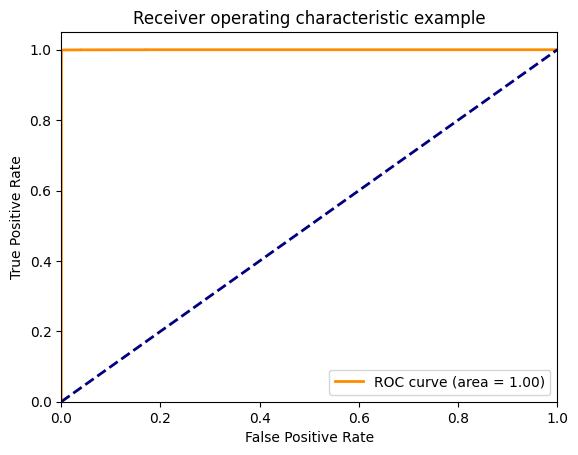

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Generate the ROC curve using the true labels and predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Printing of Confusion Matrix

[[true negatives, false positives],
 [false negatives, true positives]]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[161887     14]
 [    20   9273]]


## Model 3:
### Decision Tree

Implement Training Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X_train and X_test are DataFrames with the same columns after one-hot encoding
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predict = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

# Accuracy score
print('accuracy is', accuracy_score(y_test, y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161901
           1       0.99      1.00      0.99      9293

    accuracy                           1.00    171194
   macro avg       1.00      1.00      1.00    171194
weighted avg       1.00      1.00      1.00    171194

[[161834     67]
 [    32   9261]]
accuracy is 0.9994217087047443


Decision Tree

Printing of Confusion Matrix

[[true negatives, false positives],
 [false negatives, true positives]]

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(cm)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

[[161887     14]
 [    20   9273]]


### k-fold cross-validation

Based on the accuracy result in the previous session, the decision tree model has a very high accuracy of around 99%, which is in doubt to be a result of overfitting. Thus, we will check this overfitting by using k-fold cross-validation. <br/>

This technique involves splitting the data into k subsets (folds), training the model on k-1 subsets, and then evaluating it on the remaining fold. This process is repeated k times, with each subset acting as the test set once. <br/>

The output will show the accuracy of the model on each fold and the average accuracy over all folds. If the average accuracy is close to the accuracy on the training data, it indicates that the model is not overfitting and generalizes well to new data. However, if there is a significant drop in accuracy between training and validation, it may indicate overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier
classifier = DecisionTreeClassifier()

# Perform k-fold cross-validation with k=5 (you can change k as needed)
k = 5
scores = cross_val_score(classifier, X_train, y_train, cv=k, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores)

# Print the average accuracy over all folds
average_accuracy = scores.mean()
print("Average accuracy:", average_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Accuracy for each fold: [0.99901427 0.99881713 0.99894126 0.99897046 0.99899967]
Average accuracy: 0.9989485597459019


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


From the results shown above, the accuracy for each fold is highly similar to the average accuracy. Thus, this indicates that the model is not overfitting.

## Model 4:
### Random Forest

Implement Training Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

# Accuracy score
print('Accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161901
           1       1.00      1.00      1.00      9293

    accuracy                           1.00    171194
   macro avg       1.00      1.00      1.00    171194
weighted avg       1.00      1.00      1.00    171194

[[161885     16]
 [    44   9249]]
Accuracy is 0.9996495204271177


Random Forest

Printing of Confusion Matrix

[[true negatives, false positives],
 [false negatives, true positives]]

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(cm)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

[[161887     14]
 [    20   9273]]




### k-fold cross-validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming you have X_train and Y_train as your training data

# Create the Random Forest classifier
classifier = RandomForestClassifier()

# Perform k-fold cross-validation with k=5 (you can change k as needed)
k = 5
scores = cross_val_score(classifier, X_train, y_train, cv=k, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores)

# Print the average accuracy over all folds
average_accuracy = scores.mean()
print("Average accuracy:", average_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Accuracy for each fold: [0.99904348 0.99886824 0.99893396 0.99897046 0.99898507]
Average accuracy: 0.9989602424153918


From the results shown above, the accuracy for each fold is highly similar to the average accuracy. Thus, this indicates that the model is not overfitting.

## Model 5:
### Logistical Regression

Implement Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the resampled training data
model.fit(X_train, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9777036578384757
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    161901
           1       0.72      0.95      0.82      9293

    accuracy                           0.98    171194
   macro avg       0.86      0.96      0.91    171194
weighted avg       0.98      0.98      0.98    171194



Logistical Regression

Printing of Confusion Matrix

[[true negatives, false positives],
 [false negatives, true positives]]

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(cm)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

[[158546   3355]
 [   462   8831]]


## Model 6:
### K Nearest Neighbours

Implement Training Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the k-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can set the number of neighbors (k) based on your choice

# Fit the KNN classifier to the scaled training data
knn.fit(X_train, y_train)

# Make predictions on the scaled testing data
y_pred = knn.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9587836022290501
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    161901
           1       0.58      0.88      0.70      9293

    accuracy                           0.96    171194
   macro avg       0.79      0.92      0.84    171194
weighted avg       0.97      0.96      0.96    171194



Logistical Regression

Printing of Confusion Matrix

[[true negatives, false positives],
 [false negatives, true positives]]

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(cm)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

[[155949   5952]
 [  1104   8189]]


# Fine-tune the models

## K Nearest Neighbours

### Adjustment of parameters (selection of value of k)




k = 50


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create an instance of the k-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=50)  # You can set the number of neighbors (k) based on your choice

# Fit the KNN classifier to the scaled training data
knn.fit(X_train, y_train)

# Make predictions on the scaled testing data
y_pred = knn.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9264168136733764
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    161901
           1       0.42      0.94      0.58      9293

    accuracy                           0.93    171194
   macro avg       0.71      0.93      0.77    171194
weighted avg       0.96      0.93      0.94    171194



## GridSearch for best K Value for KNN Model




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X_train' and 'y_train' are your training data and labels
# Assuming 'X_test' and 'y_test' are your testing data and labels

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 25, 50, 100, 200]}

# Create a GridSearchCV object and perform the search
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 'cv' is the number of cross-validation folds
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_k = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_

# Print the best k value
print("Best k:", best_k)

# Retrain the best model on the full training set
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_knn_model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))



Best k: 3

Accuracy: 0.9812318188721567

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    161901
           1       0.96      0.68      0.80      9293

    accuracy                           0.98    171194

   macro avg       0.97      0.84      0.89    171194

weighted avg       0.98      0.98      0.98    171194



Tuning of the KNN model improved precison, at the expense of recall, and gave an overall higher f1-score. However, for the cases of capturing all possible defualt cases, compromising recall score might not be a favorable outcome.

## XG BOOST

XG BOOST CROSS VALIDATION TEST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming processed_df is your DataFrame and 'default_ind' is the target variable
X = processed_df.drop(columns='default_ind')
y = processed_df['default_ind']

# convert the dataset into an optimized data structure that the model can use
dtrain = xgb.DMatrix(X, label=y)

# specify the hyperparameters
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 0.1,
    'n_estimators':100,
}

# Perform cross-validation: metrics to be monitored are logloss for binary classification
cv_results = xgb.cv(
    dtrain=dtrain,
    params=params,
    nfold=5,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="logloss",
    as_pandas=True,
    seed=123,
)

print(cv_results)


[14:45:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[14:45:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[14:45:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[14:45:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[14:45:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

    train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0             0.602707           0.000015           0.602717          0.000044
1             0.528571           0.000026           0.528577          0.000077
2             0.466739           0.000068           0.466762          0.000162
3             0.414393           0.000111           0.414422          0.000256
4             0.369598           0.000033           0.369616          0.000145
5             0.330907           0.000025           0.330923          0.0001

##Linear Support Vector Classifier

In [ ]:
# Predict on the training set
y_train_pred = clf.predict(X_train)

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model's performance on the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))



Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    647711
           1       0.98      0.81      0.89     37064

    accuracy                           0.99    684775
   macro avg       0.98      0.90      0.94    684775
weighted avg       0.99      0.99      0.99    684775

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    161791
           1       0.98      0.81      0.89      9403

    accuracy                           0.99    171194
   macro avg       0.98      0.91      0.94    171194
weighted avg       0.99      0.99      0.99    171194



# Evaluate the outcomes

# Comparison of Models' Performance



*  Linear Support Vector
*  XG Boost
*  Decision Tree
*  Random Forest
*  Logistical Regression
*  K Nearest Neighbours









In [ ]:
results = {
    'Linear SVM': {
        'precision': 0.98,
        'recall': 0.81,
        'f1-score': 0.89
    },
    'XG Boost': {
        'precision': 1.00,
        'recall': 1.00,
        'f1-score': 1.00
    },
    'Decision Tree': {
        'precision': 0.99,
        'recall': 1.00,
        'f1-score': 0.99
    },
    'Random Forest': {
        'precision': 1.00,
        'recall': 1.00,
        'f1-score': 1.00
    },
    'Logistic Regression': {
        'precision': 0.72,
        'recall': 0.95,
        'f1-score': 0.82
    },
    'KNN': {
        'precision': 0.96,
        'recall': 0.68,
        'f1-score': 0.80
    },
}

# Print the updated dictionary
for model, metrics in results.items():
    print(f"{model}:")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1-score: {metrics['f1-score']}")
    print()


Linear SVM:
  Precision: 0.98
  Recall: 0.81
  F1-score: 0.89

XG Boost:
  Precision: 1.0
  Recall: 1.0
  F1-score: 1.0

Decision Tree:
  Precision: 0.99
  Recall: 1.0
  F1-score: 0.99

Random Forest:
  Precision: 1.0
  Recall: 1.0
  F1-score: 1.0

Logistic Regression:
  Precision: 0.72
  Recall: 0.95
  F1-score: 0.82

KNN:
  Precision: 0.96
  Recall: 0.68
  F1-score: 0.8



Decision Tree, Random Forest and XG Boost (Which acts by grouping weaker decision trees to form strong decison trees) have the best results for this end to end project.

All three models revolve around a decision tree based model, and that seems to be the best fit for this set of loan data and classification problem.